In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
train = pd.read_csv("loan train.csv") #reading the dataset
test = pd.read_csv("loan test.csv")

# EXPLORING THE DATA

In [3]:
train.head() #checking the first few rows and columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.describe() #summary of the statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.columns #checking all the columns in the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.shape #checking the number of rows and columns

(614, 13)

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# FILLING MISSING AND NAN VALUES

In [11]:
train["LoanAmount"].fillna((train["LoanAmount"].median()), inplace=True)

In [12]:
train["Loan_Amount_Term"].fillna((train["Loan_Amount_Term"].median()), inplace=True)

In [13]:
train["Credit_History"].fillna((train["Credit_History"].median()), inplace=True)

In [14]:
train["Married"].fillna((train["Married"].mode()[0]), inplace=True)

In [15]:
train["Gender"].fillna((train["Gender"].mode()[0]), inplace=True)

In [16]:
train["Self_Employed"].fillna((train["Self_Employed"].mode()[0]), inplace=True)

In [17]:
train["Dependents"].fillna((train["Dependents"].mode()[0]), inplace=True)

In [18]:
test["Gender"].fillna((test["Gender"].mode()[0]), inplace=True)

In [19]:
test["Self_Employed"].fillna((test["Self_Employed"].mode()[0]), inplace=True)

In [20]:
test["Dependents"].fillna((test["Dependents"].mode()[0]), inplace=True)

In [21]:
test["LoanAmount"].fillna((test["LoanAmount"].median()), inplace=True)

In [22]:
test["Loan_Amount_Term"].fillna((test["Loan_Amount_Term"].median()), inplace=True)

In [23]:
test["Credit_History"].fillna((test["Credit_History"].median()), inplace=True)

In [24]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
train.shape

(614, 13)

# DATA VISUALIZATION

In [27]:
train["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [28]:
train["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
train["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [30]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [31]:
train["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

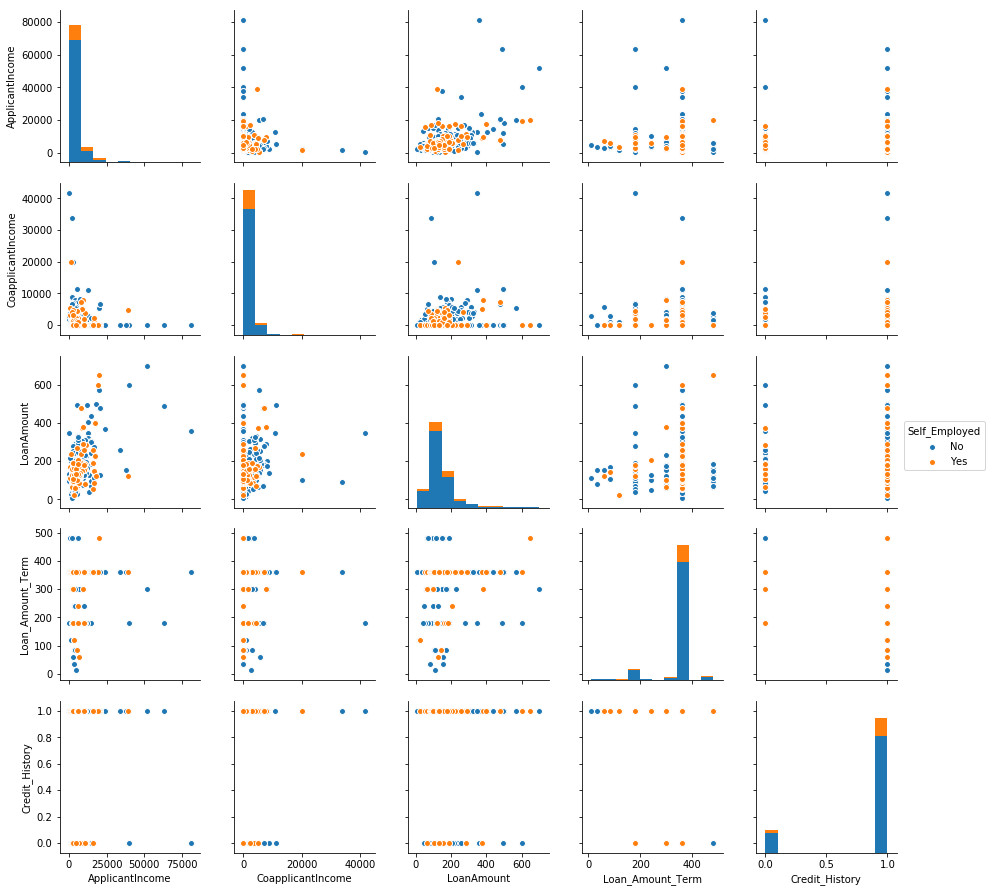

In [32]:
sns.pairplot(train, hue="Self_Employed")

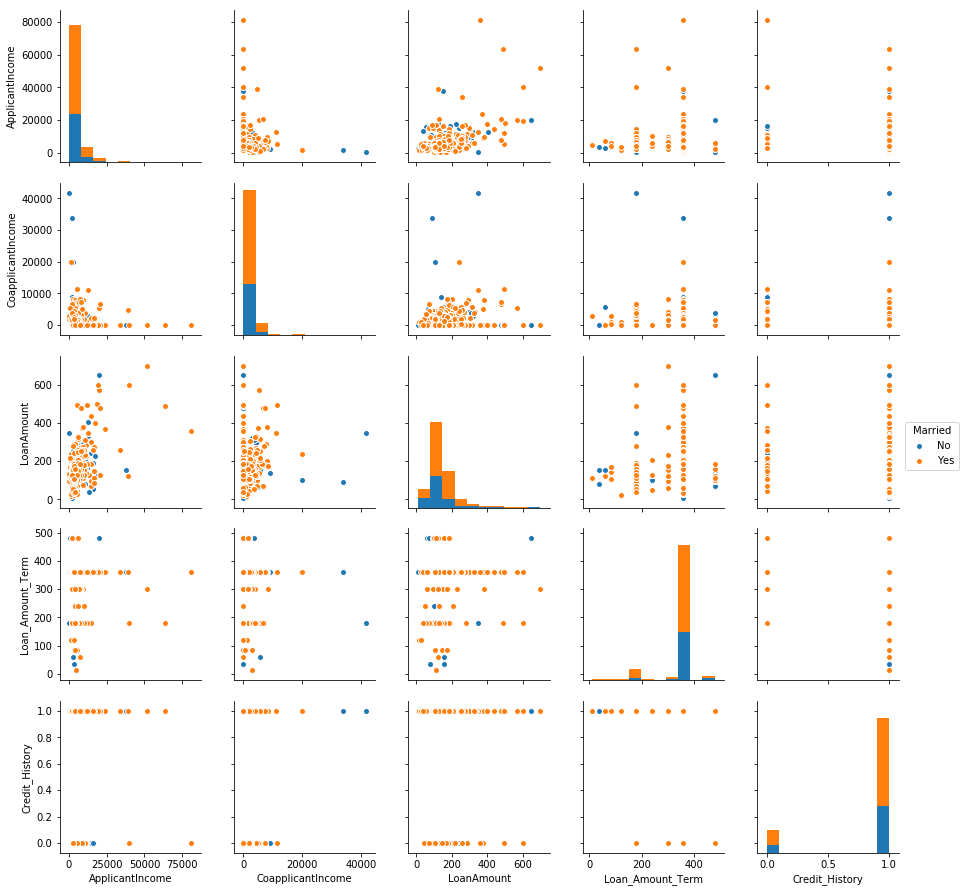

In [33]:
sns.pairplot(train, hue="Married")

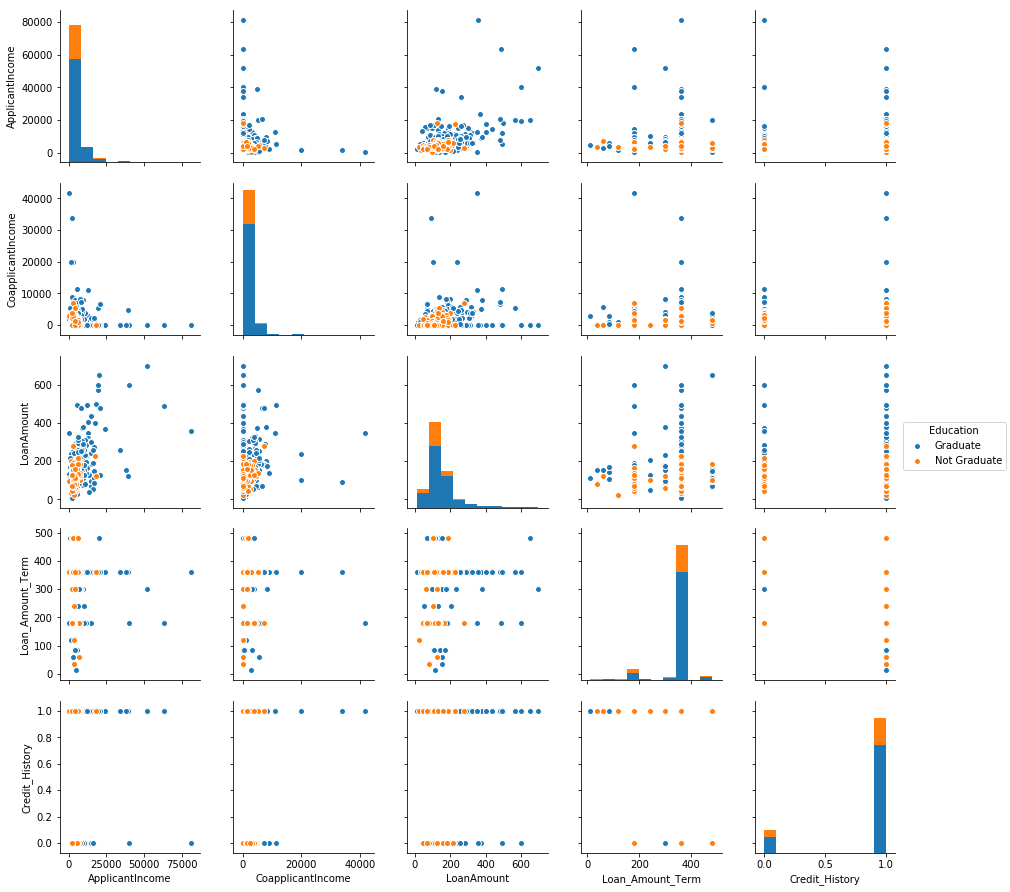

In [34]:
sns.pairplot(train, hue="Education")

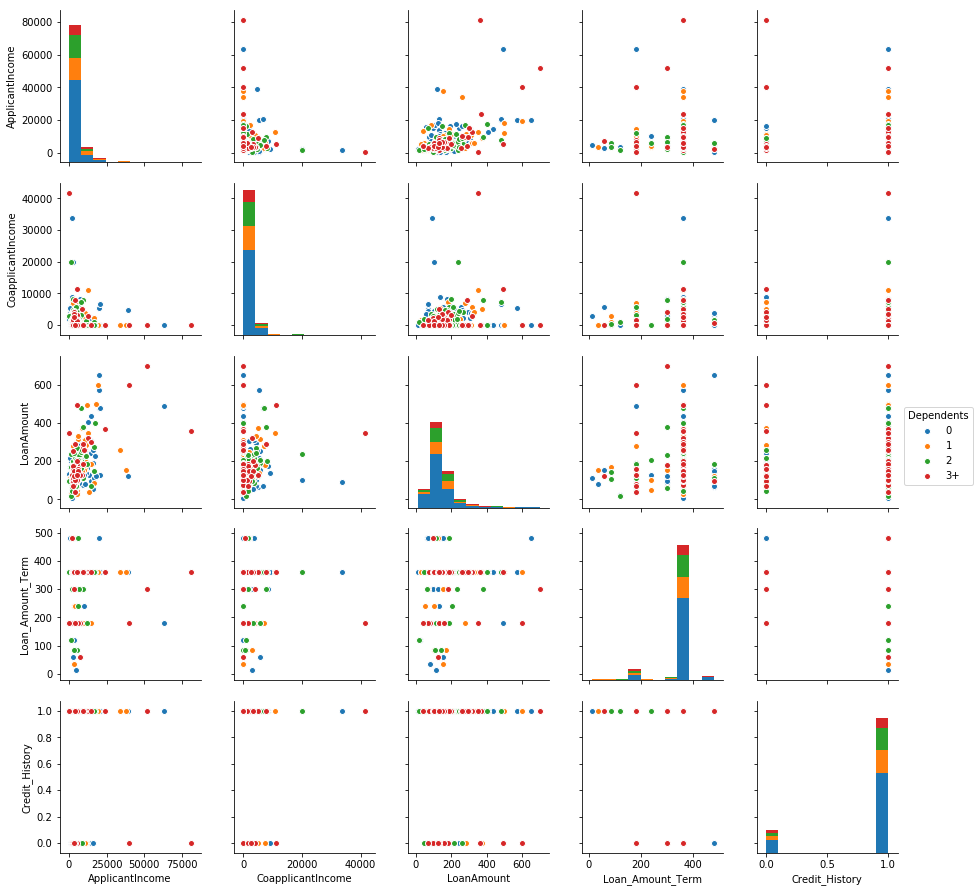

In [35]:
sns.pairplot(train, hue="Dependents")

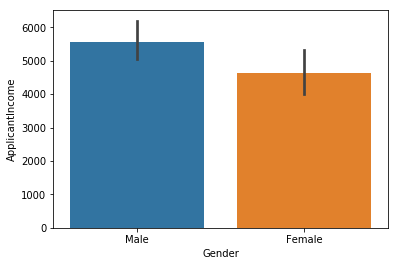

In [36]:
sns.barplot(x="Gender", y="ApplicantIncome", data=train)

# FEATURE ENGINEERING

In [37]:
train = train.drop(["Loan_ID", "Dependents"], axis=1) #dropping a column

In [38]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
test = test.drop("Dependents", axis=1)
test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [40]:
#converting categorical data into vectors that machine can deal with
cleanup_num = {"Loan_Status":   {"Y": 1, "N": 0},
              "Gender":  {"Male": 1, "Female": 0},
              "Married": {"Yes": 1, "No": 0}, "Self_Employed": {"Yes": 1, "No": 0},
              "Education": {"Graduate": 0, "Not Graduate": 1} }

In [41]:
train.replace(cleanup_num, inplace=True)
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [42]:
train['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [43]:
cleanup_num1 = {"Dependents":   {"O": 0, "1": 1, "2": 2, "3+": 3},
              "Gender":  {"Male": 1, "Female": 0},"Married": {"Yes": 1, "No": 0}, 
              "Self_Employed": {"Yes": 1, "No": 0},
              "Education": {"Graduate": 0, "Not Graduate": 1} }

In [44]:
test.replace(cleanup_num, inplace=True)
test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,0,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,0,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,0,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,0,1,0,3276,0,78.0,360.0,1.0,Urban


In [45]:
test['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,1,0,3276,0,78.0,360.0,1.0,2


In [46]:
train_data = train.drop('Loan_Status', axis=1)
target = train['Loan_Status']

train_data.shape, target.shape

((614, 10), (614,))

# MODELLING

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report 
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

In [49]:
model=LogisticRegression()
scoring = "accuracy"

In [50]:
score = cross_val_score(model, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)

In [51]:
print(score)

[0.74193548 0.85483871 0.77419355 0.77419355 0.8852459  0.86885246
 0.7704918  0.83606557 0.75409836 0.85245902]


In [52]:
round(np.mean(score)*100, 2)

81.12

In [53]:
clf = DecisionTreeClassifier()

In [54]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.70967742 0.74193548 0.64516129 0.64516129 0.7704918  0.73770492
 0.73770492 0.72131148 0.54098361 0.70491803]


In [55]:
round(np.mean(score)*100, 2)

69.55

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
R_clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(R_clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77419355 0.85483871 0.74193548 0.79032258 0.81967213 0.80327869
 0.7704918  0.75409836 0.72131148 0.7704918 ]


In [58]:
round(np.mean(score)*100, 2)

78.01

In [59]:
model.fit(train_data, target)

test_data = test.drop("Loan_ID", axis=1).copy()
prediction = model.predict(test_data)

In [60]:
pickle.dump(model, open('model.pkl','wb'))

In [61]:
pred_cols = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": prediction
    })

In [62]:
pred_cols.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
